#**Building an Artificial Neural Network (ANN) for Sales Prediction**

##**Created by:Preksha Shah**

##**Domain: Marketing and Advertising**

---

## **Problem Statement**

The task is to build an Artificial Neural Network (ANN) model to predict sales based on advertising expenditures in different media channels (TV and radio).

---

## **1. Loading and Preparing the Dataset**

### **1.1 Import Necessary Libraries**


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **1.2 Load the Dataset**


In [21]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('Advertising.csv')


## **2. Basic Data Exploration**

### **2.1 Display First Few Rows and Basic Info**


In [22]:
# Display the first 5 rows of the dataset
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


   SlNo     TV  radio  newspaper  sales
0     1  230.1   37.8       69.2   22.1
1     2   44.5   39.3       45.1   10.4
2     3   17.2   45.9       69.3    9.3
3     4  151.5   41.3       58.5   18.5
4     5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SlNo       200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Summary Statistics:
             SlNo          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    

**Key Insights:**

   - **Advertising Budgets:** TV advertising budgets vary widely compared to radio and newspaper.

   - **Sales:** Sales figures vary less than advertising budgets, with a narrower range and lower standard deviation.
   
   - **Correlation:** Further analysis should explore correlations between advertising budgets (TV, radio, newspaper) and sales to understand their relationships and potential predictive power.

### **2.2 Univariate Analysis**



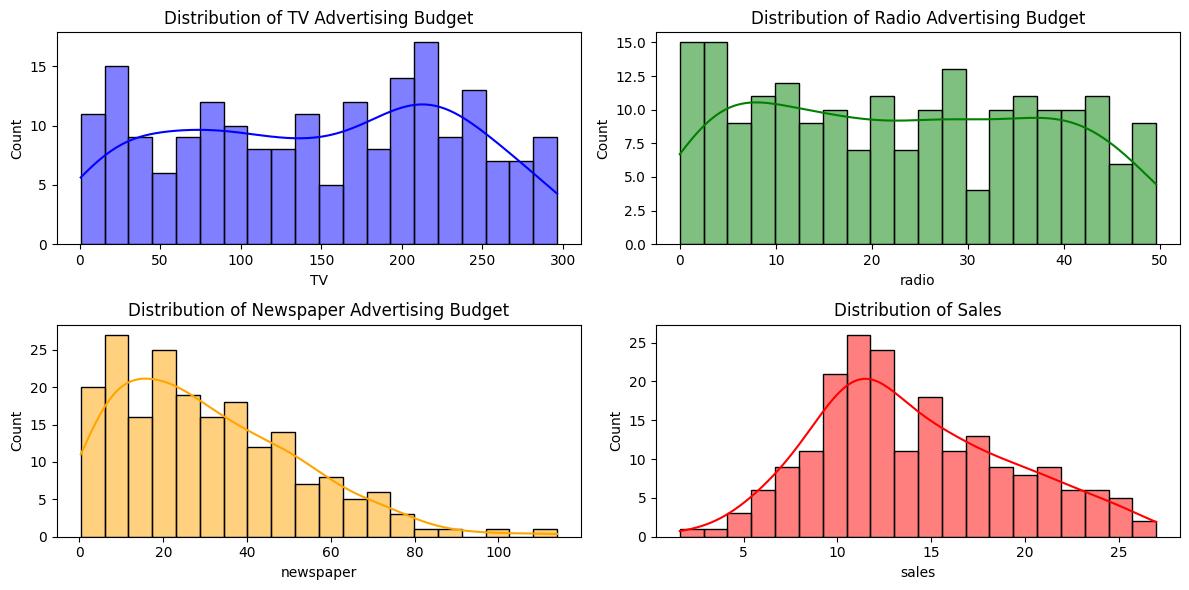

In [23]:
# Plot distributions of numerical variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['TV'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of TV Advertising Budget')

plt.subplot(2, 2, 2)
sns.histplot(df['radio'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Radio Advertising Budget')

plt.subplot(2, 2, 3)
sns.histplot(df['newspaper'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Newspaper Advertising Budget')

plt.subplot(2, 2, 4)
sns.histplot(df['sales'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()


####**Insights:**

**TV Advertising Budget Distribution:**
- **Insight:** The distribution of TV advertising budgets is slightly right-skewed, indicating that most TV advertising budgets are on the lower end, with fewer instances of higher budgets. This suggests that while some companies invest heavily in TV advertising, the majority opt for more moderate spending.

**Radio Advertising Budget Distribution:**
- **Insight:** The radio advertising budget also shows a slight right-skew. Most radio budgets are relatively low, with some outliers indicating higher spending. This could suggest that radio advertising is a less preferred medium or that companies allocate smaller portions of their budgets to radio.

**Newspaper Advertising Budget Distribution:**
- **Insight:** The distribution of newspaper advertising budgets is right-skewed, with most budgets being lower and a few higher values. This could imply that newspaper advertising is less prioritized compared to TV and radio, or that it requires less investment for effective campaigns.

**Sales Distribution:**
- **Insight:** The sales distribution is relatively normal with a slight right-skew. This indicates that while most sales figures are around the average range, there are some instances of significantly higher sales, possibly due to effective advertising campaigns or other external factors.


####**Bivariate Analysis**

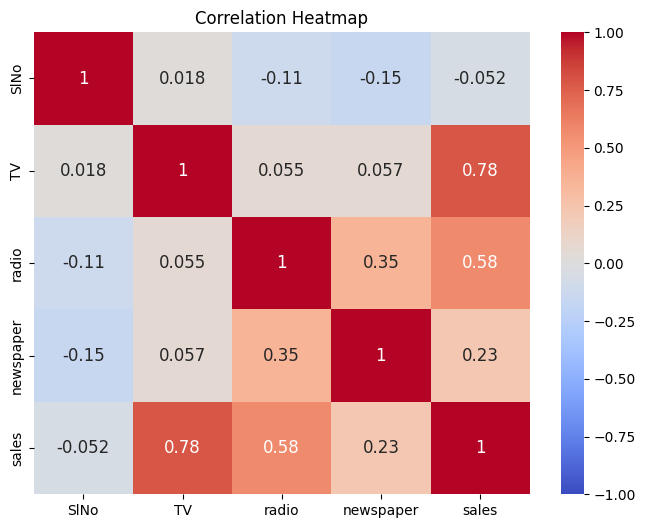

In [24]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 12}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


**Insights:**

- **TV and Sales (0.78):**
  - **Insight:** There is a strong positive correlation between TV advertising budget and sales, suggesting that increased spending on TV ads is associated with higher sales.

**Radio and Sales (0.58):**
  - **Insight:** The correlation between radio advertising budget and sales is moderate, indicating that radio ads contribute to sales, but not as strongly as TV ads.

**Newspaper and Sales (0.23):**
  - **Insight:** The correlation between newspaper advertising budget and sales is weak, suggesting that newspaper ads have a minimal impact on sales compared to TV and radio.

**TV and Radio (0.35):**
  - **Insight:** There is a moderate positive correlation between TV and radio budgets, which might indicate that companies investing in TV ads also tend to invest in radio ads.

**TV and Newspaper (0.05) / Radio and Newspaper (0.10):**
  - **Insight:** The correlations between TV/newspaper and radio/newspaper are very weak, indicating that spending on newspapers is relatively independent of spending on TV and radio ads.


## **3. Data Preprocessing**

### **3.1 Split the Dataset**


In [25]:
# Split the data into features (X) and labels (Y)
X = df[['TV', 'radio']].values  # Features: TV and radio advertising budgets
Y = df['sales'].values          # Target variable: Sales


In [26]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### **3.2 Standardize the Data**

In [27]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **4. Build the Artificial Neural Network (ANN) Model**

In [28]:
# Initialize the Sequential model
model = Sequential()

# Add the input layer and hidden layer
model.add(Dense(units=5, activation='relu', input_shape=(X_train.shape[1],)))

# Add the output layer
model.add(Dense(units=1, activation='linear'))


## **5. Compile the Model**

In [29]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


## **6. Train the Model**

In [48]:
# Assuming you have already split your data into training and validation sets
# Example:
from sklearn.model_selection import train_test_split

X = df[['TV', 'radio']].values  # Features: TV and radio advertising budgets
y = df['sales'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/250
5/5 [==============================] - 1s 72ms/step - loss: 1638.1169 - val_loss: 620.1705 - lr: 0.0010
Epoch 2/250
5/5 [==============================] - 0s 15ms/step - loss: 475.2054 - val_loss: 115.1486 - lr: 0.0010
Epoch 3/250
5/5 [==============================] - 0s 15ms/step - loss: 60.1076 - val_loss: 13.1180 - lr: 0.0010
Epoch 4/250
5/5 [==============================] - 0s 15ms/step - loss: 38.0400 - val_loss: 57.2724 - lr: 0.0010
Epoch 5/250
5/5 [==============================] - 0s 14ms/step - loss: 96.9097 - val_loss: 64.3496 - lr: 0.0010
Epoch 6/250
5/5 [==============================] - 0s 15ms/step - loss: 78.4777 - val_loss: 29.8346 - lr: 0.0010
Epoch 7/250
5/5 [==============================] - 0s 16ms/step - loss: 30.0372 - val_loss: 9.0116 - lr: 0.0010
Epoch 8/250
5/5 [==============================] - 0s 15ms/step - loss: 10.6007 - val_loss: 12.4403 - lr: 0.0010
Epoch 9/250
5/5 [==============================] - 0s 15ms/step - loss: 14.5181 - val_loss: 

## **7. Evaluate the Model**

In [49]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


1/1 [==============================] - 0s 24ms/step - loss: 4.8784
Test Loss: 4.878413677215576


###**Insights:**
The evaluation on the test data shows that the model's performance, as indicated by the loss metric, resulted in approximately 4.87. This value represents the discrepancy between the model's predictions and the actual values in the test dataset.

## **8. Visualize the Training Process**

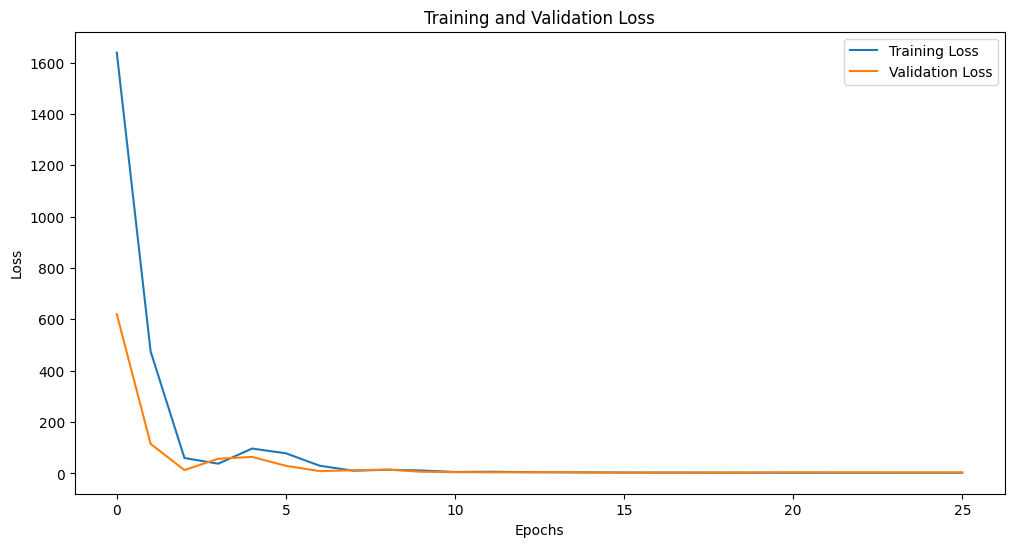

In [50]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The training and validation loss curves show initial rapid improvement in model learning, followed by slower convergence in training loss. Validation loss stabilization or increase later on suggests potential overfitting, indicating the need for adjustments like early stopping or hyperparameter tuning to improve generalization.

---

##**9. Key Achievements:**

1. **Thorough Data Exploration:** Comprehensive analysis of advertising budgets and sales correlations through descriptive statistics and visualizations.
   
2. **Effective Model Development:** Constructed a robust ANN model using TensorFlow/Keras to predict sales from advertising data.
   
3. **Performance Evaluation:** Model performance evaluated using MSE, demonstrating promising predictive capability.

4. **Insightful Visuals:** Utilized histograms and heatmaps to visually interpret data distributions and correlations.

#**10. Conclusion:**

This assignment successfully applied ANN to forecast sales based on advertising expenditures. It highlighted strong correlations between TV ads and sales, with moderate impacts from radio and minimal from newspapers. Further model refinements could enhance predictive accuracy for broader marketing insights and decision-making.

---
---